Step 1: Importing, Assessing, Cleaning, Preparing!

In [10]:
# import relevant libraries for cleaning and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data and check it
data = pd.read_csv(r"D:\Programming\kjkingsley.github.io\Netflix Project\netflix-rotten-tomatoes-metacritic-imdb.csv")
data.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [11]:
# explore full column list to start considering analysis
# and clarify names to call
print(data.columns)


Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')


In [12]:
# simplify names for chart visibility & convenience
data = data.rename(columns={'Rotten Tomatoes Score' : 'RT_Score', 'Metacritic Score' : 'MC_Score', 'Awards Received' : 'Num_Awards',
       'Awards Nominated For' : 'Awards_Nom', 'Netflix Release Date' : 'NF_Release'}, inplace=False)
data.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score', 'RT_Score', 'MC_Score',
       'Num_Awards', 'Awards_Nom', 'Boxoffice', 'Release Date', 'NF_Release',
       'Production House', 'Netflix Link', 'IMDb Link', 'Summary',
       'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer', 'Trailer Site'],
      dtype='object')

Few things immediately clear as not relevant/useful to analysis:
'Netflix Link', 'IMDb Link', 'Summary', 'Image', 'Poster', 'TMDb Trailer', 'Trailer Site'.

In [13]:
# drop any cols definitely not relevant to movie quality, 
# viewership etc. 
# (Although nb.: "Summary" could be used for ML analysis!)
data = data.drop(columns=['Netflix Link', 'IMDb Link',
       'Summary','Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'], inplace=False)

In [14]:
# check dtypes & nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 15480 non-null  object 
 1   Genre                 13770 non-null  object 
 2   Tags                  15413 non-null  object 
 3   Languages             13526 non-null  object 
 4   Series or Movie       15480 non-null  object 
 5   Hidden Gem Score      13379 non-null  float64
 6   Country Availability  15461 non-null  object 
 7   Runtime               15479 non-null  object 
 8   Director              10772 non-null  object 
 9   Writer                11150 non-null  object 
 10  Actors                13555 non-null  object 
 11  View Rating           8456 non-null   object 
 12  IMDb Score            13381 non-null  float64
 13  RT_Score              6382 non-null   float64
 14  MC_Score              4336 non-null   float64
 15  Num_Awards         

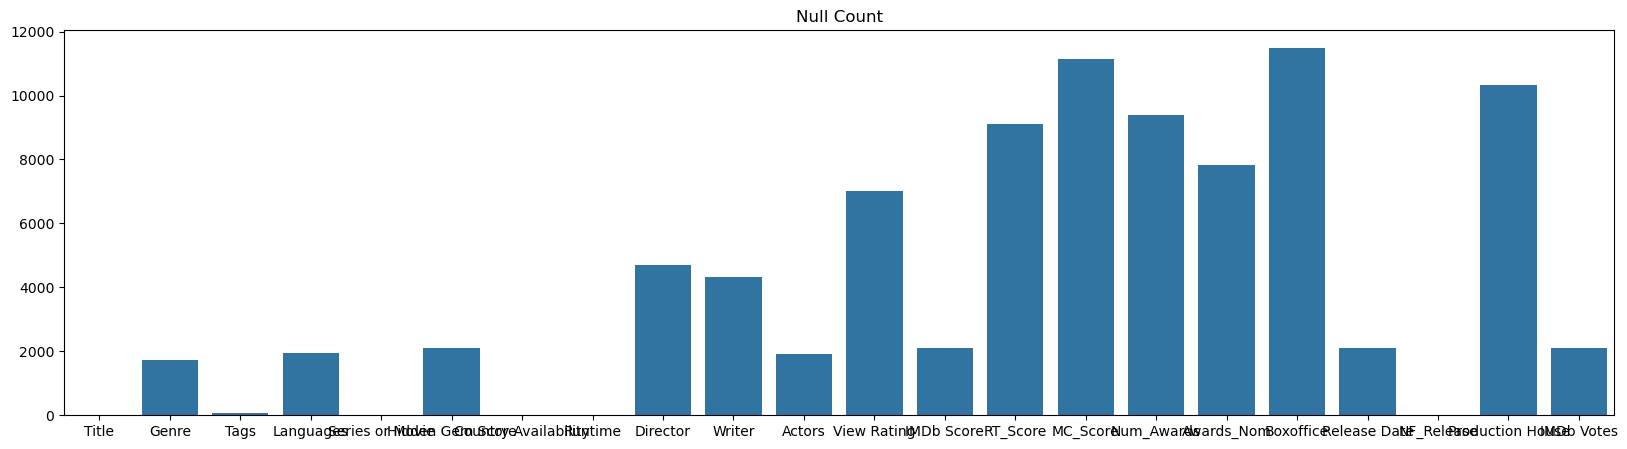

In [15]:
# Significant missing values, visualise for comparison
plt.figure(figsize=(20,5))
sns.barplot(data.isnull().sum())
plt.title('Null Count')
plt.show()


MC_score, Boxoffice and Production House all around 2/3rds null, so unfair to include in analysis.

In [16]:
# drop high null column(s)
quality_data = data.drop(columns=["MC_Score", 'Boxoffice', 'Production House'])

I'd be interested in exploring biases in ratings, such as within genres, region/language availability, or popularity.

Things that I'd expect to have some/any impact on ratings: 

'Genre', 'Languages', 'Country Availability', 'Runtime', 'Director', 'Actors', 'Num_Awards', 'Awards_Nom', 'Boxoffice', 'Release Date', 'NF_Release'.

In [17]:
# create a table of unique values to clarify which to set as category dtype, 
# to help write functions for analysis after.
unique_counts = pd.DataFrame.from_records([(col, quality_data[col].nunique()) for col in quality_data.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
4,Series or Movie,2
7,Runtime,4
11,View Rating,28
12,IMDb Score,83
5,Hidden Gem Score,93
13,RT_Score,101
14,Num_Awards,130
15,Awards_Nom,200
3,Languages,1437
1,Genre,1780


In [18]:
quality_data[['Series or Movie', 'Runtime']] = quality_data[['Series or Movie', 'Runtime']].astype('category')

2: Data Analysis
================
I will start by exploring basic correlations through a heatmap.

<Figure size 640x480 with 0 Axes>

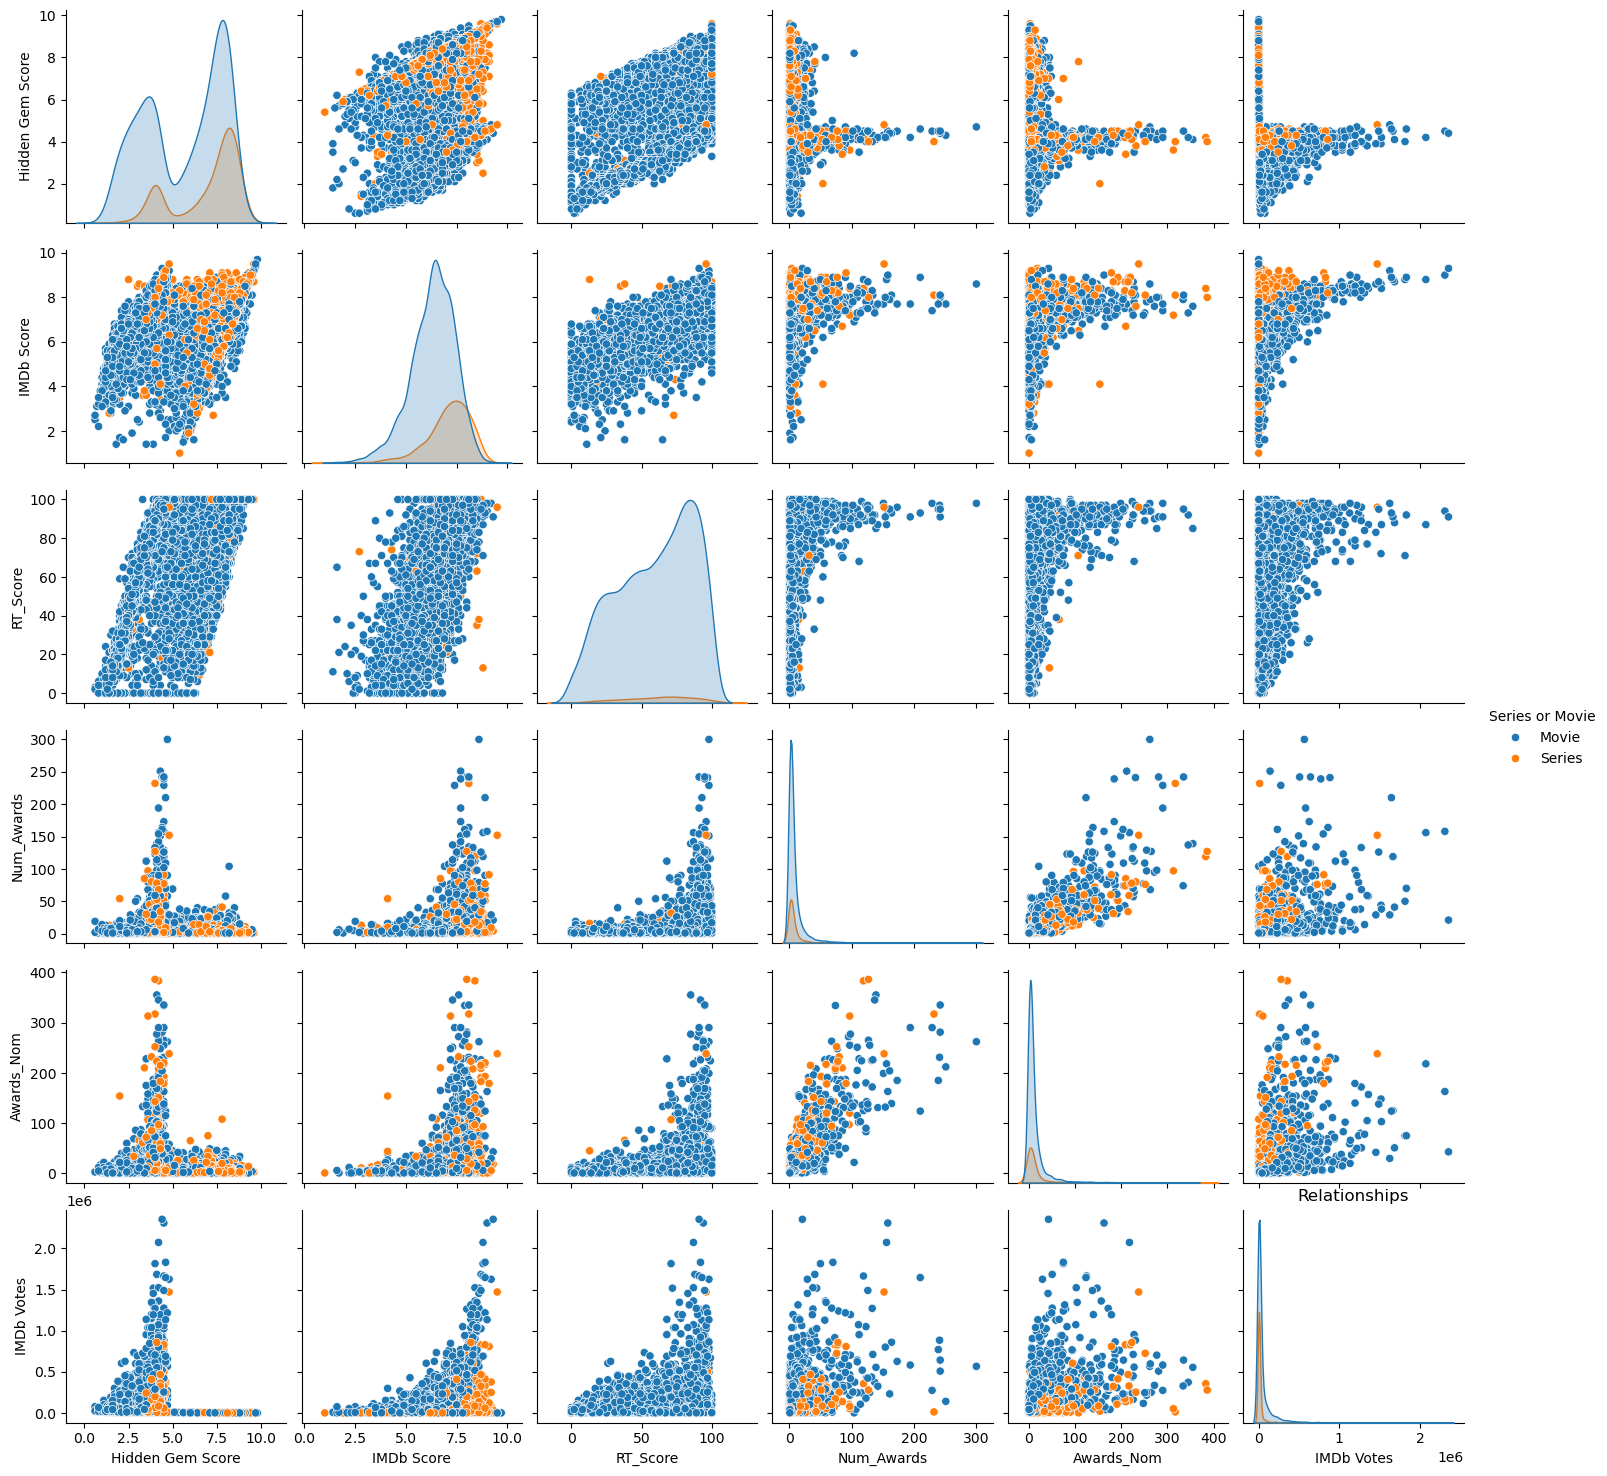

In [25]:
plt.figure()
sns.pairplot(quality_data, hue='Series or Movie')
plt.title('Relationships')
plt.show()

<Axes: >

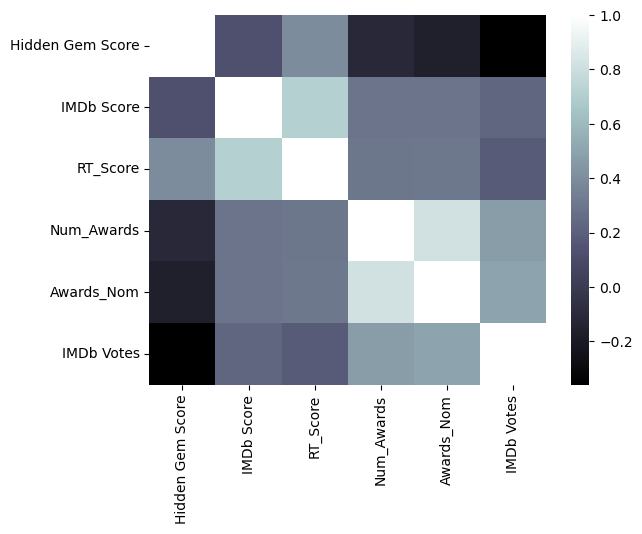

In [24]:
# compare numeric correlations
mycorr = quality_data.corr(numeric_only=True)
sns.heatmap(mycorr, cmap='bone')


Generally correlations are as one would expect:
- More imdb votes generally <-> Higher imdb score
- More award noms/awarded <-> Higher imdb score
- Hidden Gem anticorrelated with IMDb, and little/no correlation with RT.

Which suggests real insights likely to be drawn from categorical data, such as genres and regions.


"What would my answer look like?"

I'd like to be able to visualise the relationship between different Genres (or Languages) and scores.
That means: being able to easily call and contrast the values for each Genre.

Genre (& Languages) stuck as messy strings, but if I convert to categories I will just get categories of each long string.
I'll need to create a filtered df based on unique instances in a series.



Need to get full list of unique Genres:

In [235]:
genre_names = quality_data['Genre'].str.split(', ', expand=True).stack().unique()
genre_names

array(['Crime', 'Drama', 'Fantasy', 'Horror', 'Romance', 'Comedy',
       'Thriller', 'Animation', 'Short', 'Family', 'Mystery', 'Action',
       'Adventure', 'Sci-Fi', 'Music', 'Biography', 'Sport', 'War',
       'History', 'Documentary', 'Film-Noir', 'Musical', 'Game-Show',
       'Western', 'Reality-TV', 'Talk-Show', 'News', 'Adult'],
      dtype=object)

Need rows to be genre_names, columns to be average scores across each movie/series with that genre label.

I.e., need to trawl through entries for each genre mention and compile votes.

In [243]:
# create a df grouping mentions of genre 
genre_names = genre_names.tolist()
genre_dict = {}
for genre in genre_names:
    if genre not in genre_dict.keys():
        genre_dict.update({genre : 0})
genre_dict

{'Crime': 0,
 'Drama': 0,
 'Fantasy': 0,
 'Horror': 0,
 'Romance': 0,
 'Comedy': 0,
 'Thriller': 0,
 'Animation': 0,
 'Short': 0,
 'Family': 0,
 'Mystery': 0,
 'Action': 0,
 'Adventure': 0,
 'Sci-Fi': 0,
 'Music': 0,
 'Biography': 0,
 'Sport': 0,
 'War': 0,
 'History': 0,
 'Documentary': 0,
 'Film-Noir': 0,
 'Musical': 0,
 'Game-Show': 0,
 'Western': 0,
 'Reality-TV': 0,
 'Talk-Show': 0,
 'News': 0,
 'Adult': 0}

In [256]:
quality_data['Genre'].dropna()
quality_data[quality_data['Genre'].str.contains(key)]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [254]:
for key in genre_dict:
    if quality_data['Genre'].str.contains(key):
        genre_dict[key] = +1

genre_dict


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [252]:
quality_data['Genre'].astype('string')


0        Crime, Drama, Fantasy, Horror, Romance
1                                        Comedy
2                               Drama, Thriller
3                                         Drama
4                       Animation, Short, Drama
                          ...                  
15475                                      <NA>
15476                                      <NA>
15477                 Animation, Comedy, Family
15478                 Animation, Comedy, Family
15479         Animation, Action, Comedy, Family
Name: Genre, Length: 15480, dtype: string

In [229]:
# gather only numeric columns 
numeric_data = quality_data.select_dtypes(include='number')


In [ ]:
example = {}
df_eg = pd.DataFrame(example)

In [ ]:
# create a df with genres as index, and average scores as columns
genre_scores = quality_data.groupby
example = {}
df_eg = pd.DataFrame(example)

genres = []
for entry in quality_data['Genre']:
    if entry 
.apply(lambda x: x.strip() if isinstance(x, str) else x)

Genre and Languages should be categorisable, so will need to clean up:

In [90]:
cols_to_exclude = ['IMDb Score', 'Hidden Gem Score', 'RT_Score', 'Num_Awards', 'Awards_Nom']
for col in quality_data.columns:
    if quality_data[col].nunique() < 1800 and col not in cols_to_exclude:
        quality_data[col] = quality_data[col].astype('category')

In [91]:
quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Title                 15480 non-null  object  
 1   Genre                 0 non-null      category
 2   Tags                  15413 non-null  object  
 3   Languages             13526 non-null  category
 4   Series or Movie       15480 non-null  category
 5   Hidden Gem Score      13379 non-null  float64 
 6   Country Availability  15461 non-null  object  
 7   Runtime               15479 non-null  category
 8   Director              10772 non-null  object  
 9   Writer                11150 non-null  object  
 10  Actors                13555 non-null  object  
 11  View Rating           8456 non-null   category
 12  IMDb Score            13381 non-null  float64 
 13  RT_Score              6382 non-null   float64 
 14  Num_Awards            6075 non-null   float64 
 15  Aw

In [93]:
# Categorising has made lists into individual categories, so need to undo and split lists:

In [94]:
# assign dtypes to improve efficiency
quality_data['Genre'].unique()
#numeric_data = quality_data.select_dtypes(include='number')

[NaN]
Categories (0, object): []

Step 2: Begin exploring relationships and drawing hypotheses.

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

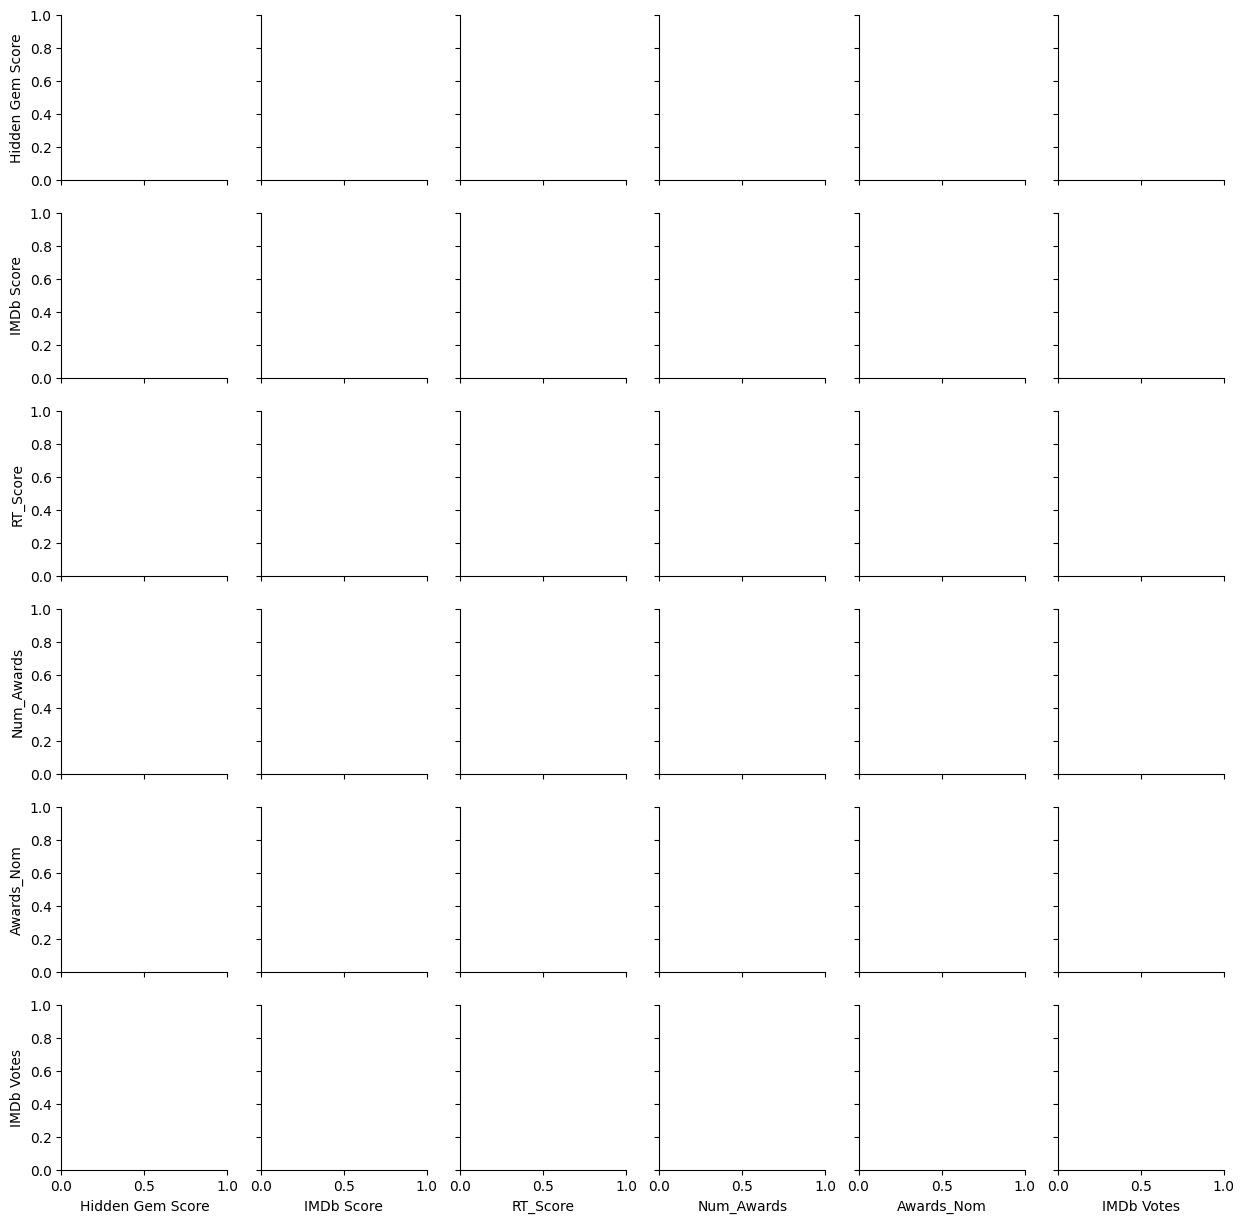

In [95]:
plt.figure()
sns.pairplot(quality_data)
plt.title('Relationships')
plt.show()

Awards nominated & awards seems to have an impact.
 

<Axes: >

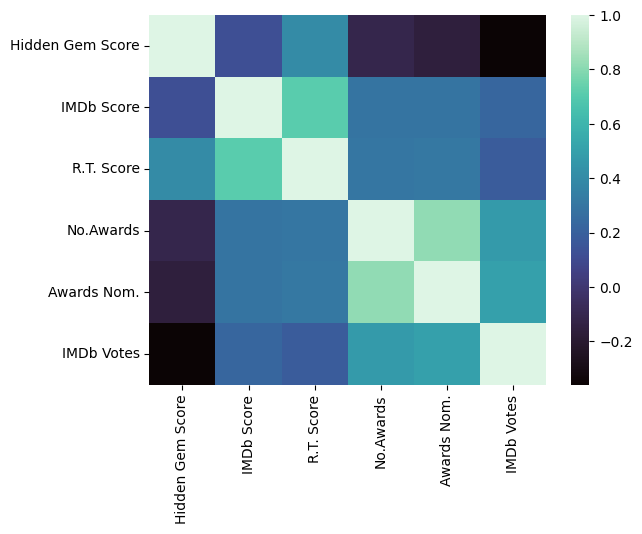

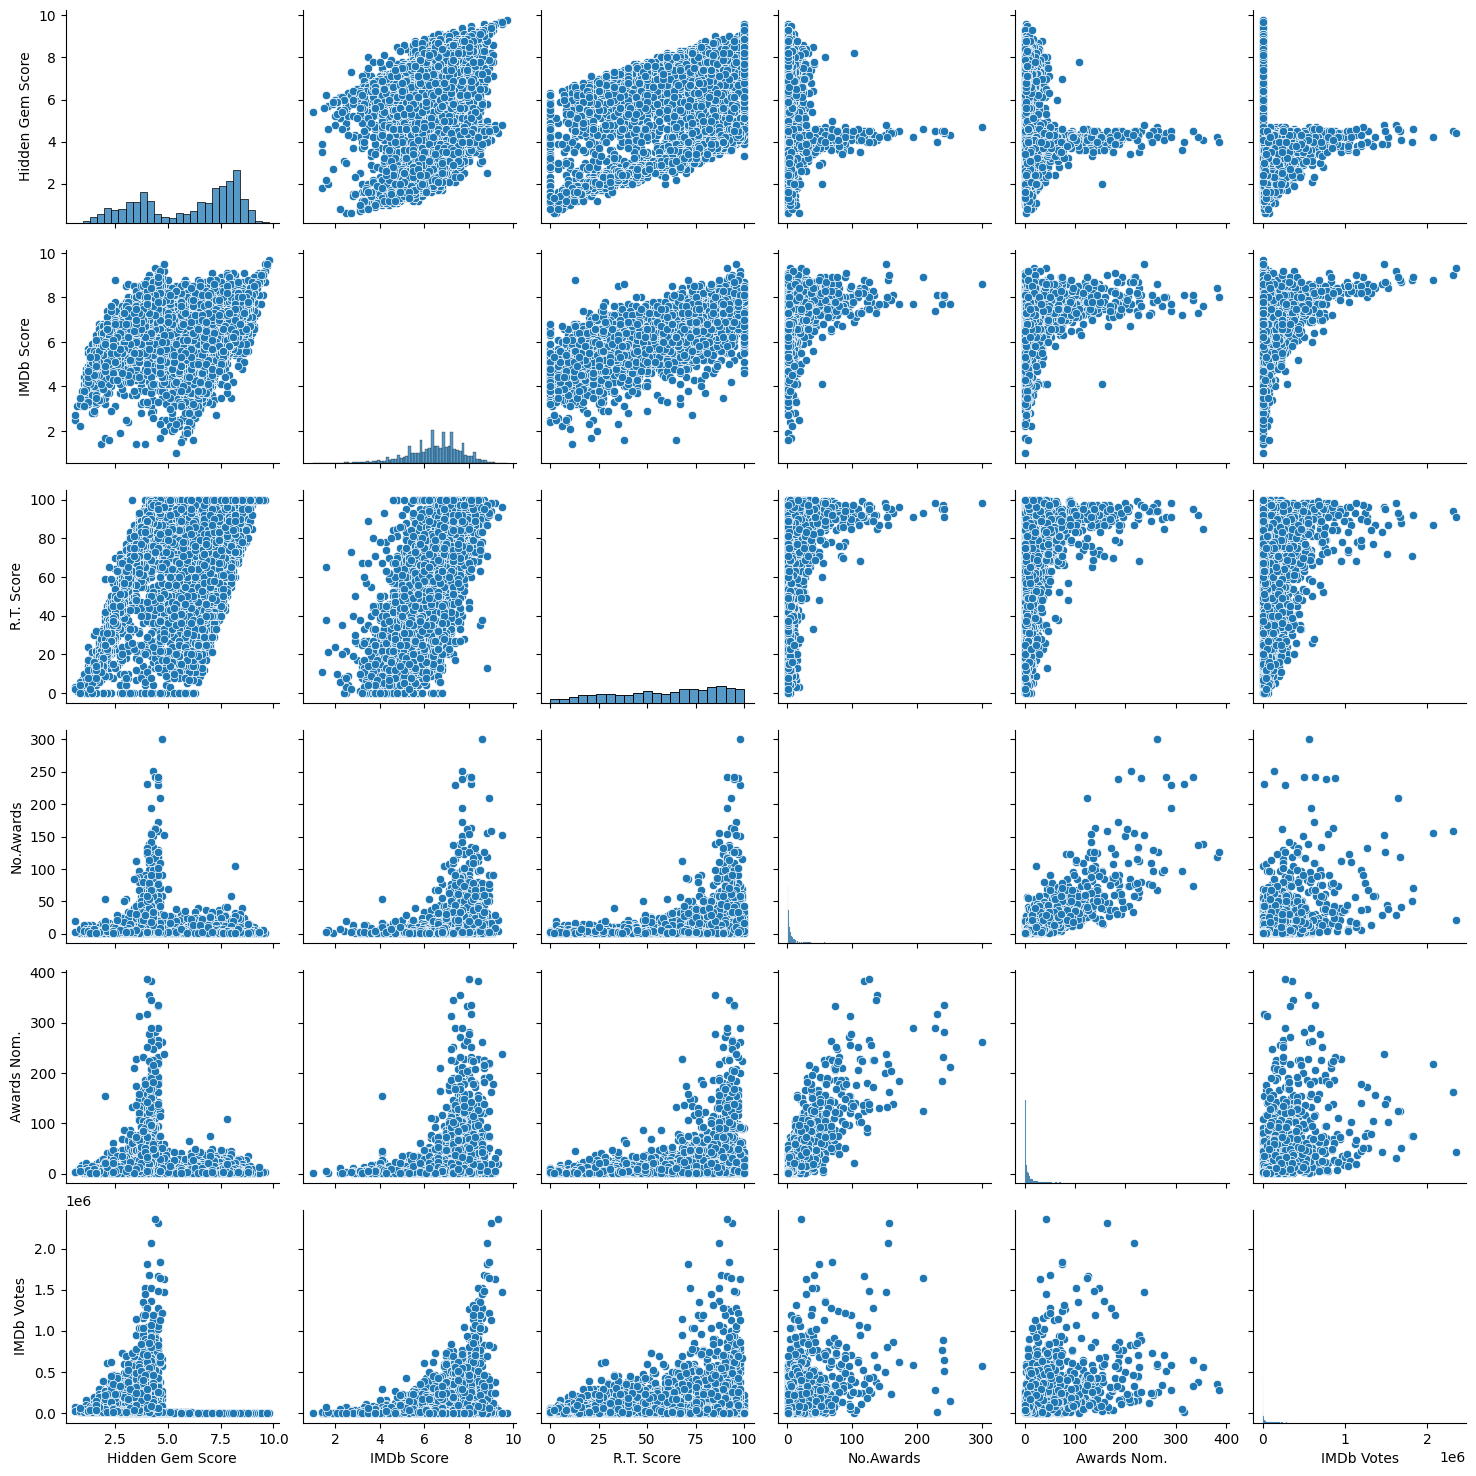